In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##  Upstream Differencing convergence testing using the L2 norm. I used dt = dx/2. I took the values of solution at 3 grid spacing values, namely Ext = 10,50,100

In [2]:
X = np.loadtxt('Up_Diff.txt')

In [3]:
x = np.linspace(0,2*pi,10),np.linspace(0,2*pi,50),np.linspace(0,2*pi,100)
t = 2*np.pi
U = np.array([[5.55112e-17,0.209803,0.321437,0.282667,0.111634,-0.111634,-0.282667,-0.321437,-0.209803,5.55112e-17],
             X[0:50],X[50:150]])

<ipython-input-3-d7f402b93160>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  U = np.array([[5.55112e-17,0.209803,0.321437,0.282667,0.111634,-0.111634,-0.282667,-0.321437,-0.209803,5.55112e-17],


In [4]:
dx = np.array([x[0][1],x[1][1],x[2][1]])

predicted_value_10 = np.sin(x[0]-t)

predicted_value_50 = np.sin(x[1]-t)

predicted_value_100 = np.sin(x[2]-t)


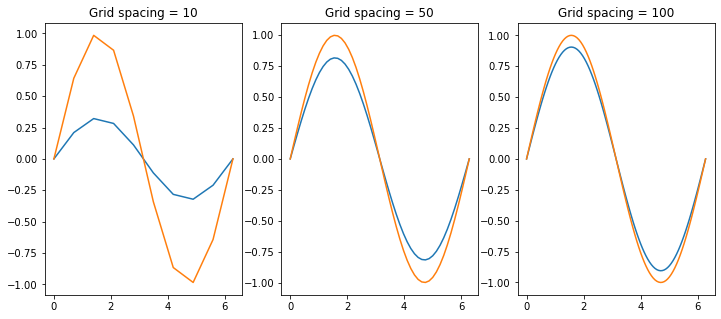

In [5]:
fig, ax = pyplot.subplots(1,3, figsize=(12, 5))
ax[0].set_title('Grid spacing = 10')
ax[0].plot(x[0],U[0])
ax[0].plot(x[0],predicted_value_10)

ax[1].set_title('Grid spacing = 50')
ax[1].plot(x[1],U[1])
ax[1].plot(x[1],predicted_value_50)

ax[2].set_title('Grid spacing = 100')
ax[2].plot(x[2],U[2])
ax[2].plot(x[2],predicted_value_100)

## $$L_{2} = \sqrt{\sum_{i}^{n} (y_{i}-f(x_{i}))^{2}}$$

In [6]:
l2_10 = np.sqrt(np.sum(np.power((U[0]-predicted_value_10),2)))
print(np.log(l2_10)) 

0.35692628369157314


In [7]:
l2_50 = np.sqrt(np.sum(np.power((U[1]-predicted_value_50),2)))
print(np.log(l2_50)) 

-0.10142529806334288


In [8]:
l2_100 = np.sqrt(np.sum(np.power((U[2]-predicted_value_100),2)))
print(np.log(l2_100)) 

-0.40394679624141894


Text(0, 0.5, '$L_{2}$')

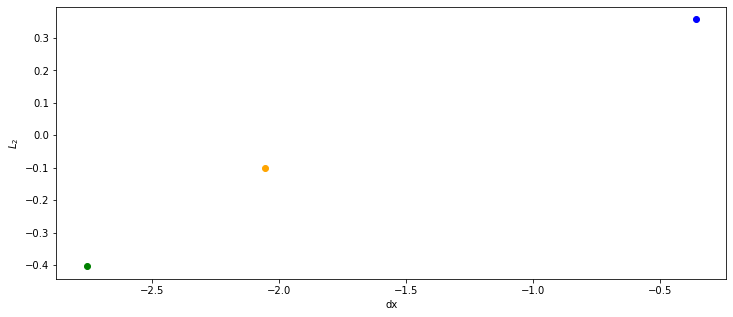

In [9]:
fig, ax = pyplot.subplots(1,1, figsize=(12, 5))
ax.scatter(np.log(dx[0]),np.log(l2_10),c = 'blue')
ax.scatter(np.log(dx[1]),np.log(l2_50),c='orange')
ax.scatter(np.log(dx[2]),np.log(l2_100),c='green')
ax.set_xlabel('dx')
ax.set_ylabel('$L_{2}$')

In [10]:
slope = (np.log(l2_10/l2_100))/(np.log(dx[0]/dx[2]))

print(slope)

0.3173087200947874


In [11]:
print(np.log(dx))

[-0.35934751 -2.05394323 -2.75724278]


This scheme of differencing converges about half as quickly as the down-stream method does and seems to become more stable as the grid spacing approaches zero.